In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

In [21]:
# Import csv files
data = Path("sources/Amazon Customer Behavior Survey.csv")
data_df = pd.read_csv(data)

data_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


# Impact customer reviews and personalized recommendations have on shopping behaviours.

In [26]:
reviews_recs = data_df[['Customer_Reviews_Importance', 'Review_Reliability', 'Review_Helpfulness', 
                        'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness', 'Purchase_Frequency']]

reviews_recs.head(10)

,Customer_Reviews_Importance,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Purchase_Frequency
0,1,Occasionally,Yes,Yes,Yes,Few times a month
1,1,Heavily,Yes,Yes,Sometimes,Once a month
2,2,Occasionally,No,No,No,Few times a month
3,5,Heavily,Yes,Sometimes,Sometimes,Once a month
4,1,Heavily,Yes,Yes,Yes,Less than once a month
5,1,Heavily,Yes,No,No,Less than once a month
6,1,Heavily,Yes,No,Sometimes,Less than once a month
7,1,Heavily,Sometimes,No,Sometimes,Few times a month
8,1,Moderately,Yes,Sometimes,Yes,Less than once a month
9,1,Heavily,Yes,No,Yes,Less than once a month


Compare: customer reviews vs personalized recommendations as a whole


Customer Reviews (CR): customer reviews importance (int) & review reliabilty (str) & review helpfullness (boolean)
Personalized Recommendations (PR): personalized recommendation frequency (boolean) & recommendation helpfulness (boolean)

1. Bar graphs/Pie Charts showing relationships between purchase frequency, sale count, and 'Review_Helpfulness' and/or 'Recommendation_Helpfulness'

2. Graphs showing relationships between purchase frequency, sale count, and 

In [28]:
unique_purchase_frequency = data_df['Purchase_Frequency'].unique()
print("Unique values in Purchase_Frequency column:")
print(unique_purchase_frequency)

Unique values in Purchase_Frequency column:
['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']


In [31]:
unique_review_helpfulness = data_df['Review_Helpfulness'].unique()
print("Unique values in Review Helpfulness column:")
print(unique_review_helpfulness)

Unique values in Review Helpfulness column:
['Yes' 'No' 'Sometimes']


In [32]:
unique_recommendation_helpfulness = data_df['Recommendation_Helpfulness'].unique()
print("Unique values in Recommendation Helpfulness column:")
print(unique_recommendation_helpfulness)

Unique values in Recommendation Helpfulness column:
['Yes' 'Sometimes' 'No']


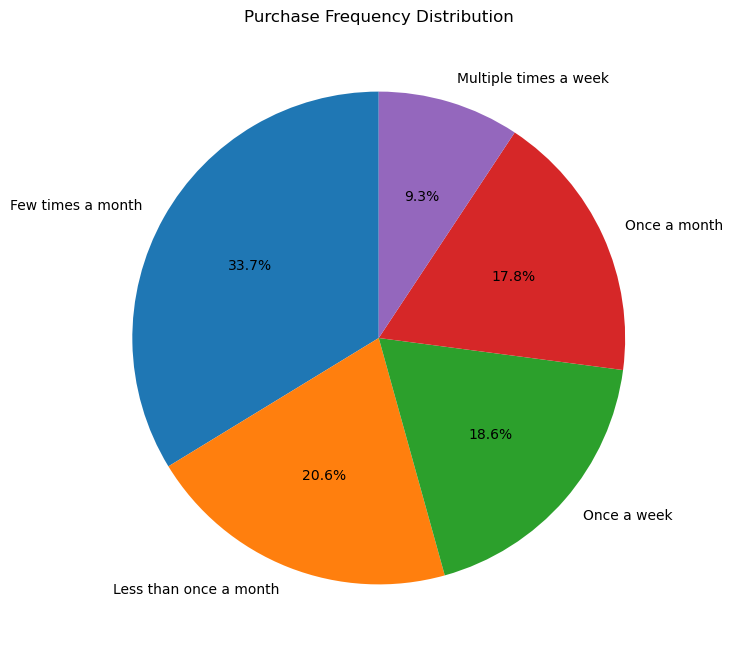

In [44]:
# pie chart
# group data by 'purchase frequency' and calculate counts
purchase_frequency_counts = data_df['Purchase_Frequency'].value_counts()

# create pie chart
plt.figure(figsize=(8,8))
plt.pie(purchase_frequency_counts, labels=purchase_frequency_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Frequency Distribution')

plt.show()

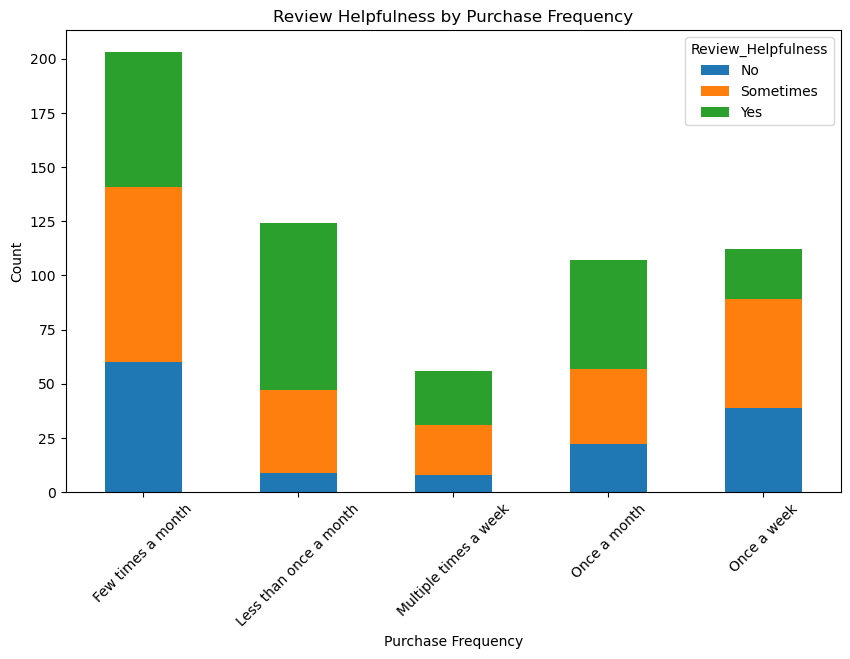

In [41]:
# bar graph 
unique_grouped = data_df.groupby(['Purchase_Frequency', 'Review_Helpfulness']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Review Helpfulness by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

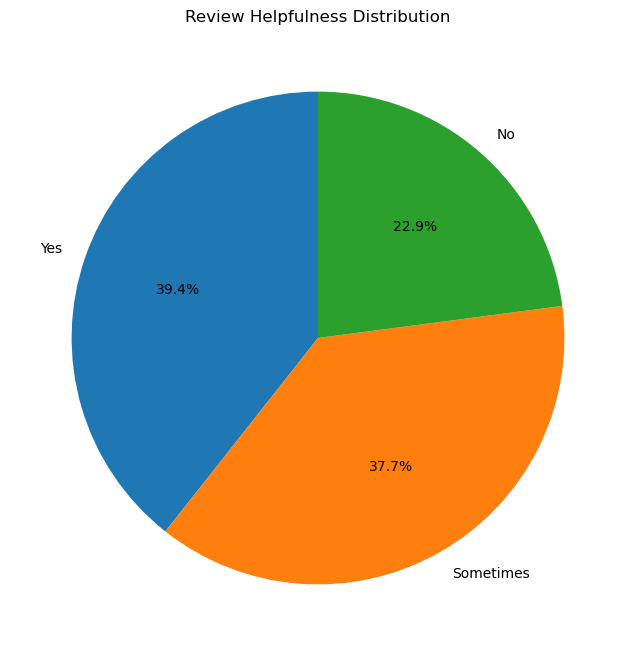

In [45]:
# pie chart
# group data by 'Review Helpfulness' and calculate counts
review_helpfulness_counts = data_df['Review_Helpfulness'].value_counts()

# create pie chart
plt.figure(figsize=(8,8))
plt.pie(review_helpfulness_counts, labels=review_helpfulness_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Review Helpfulness Distribution')

plt.show()

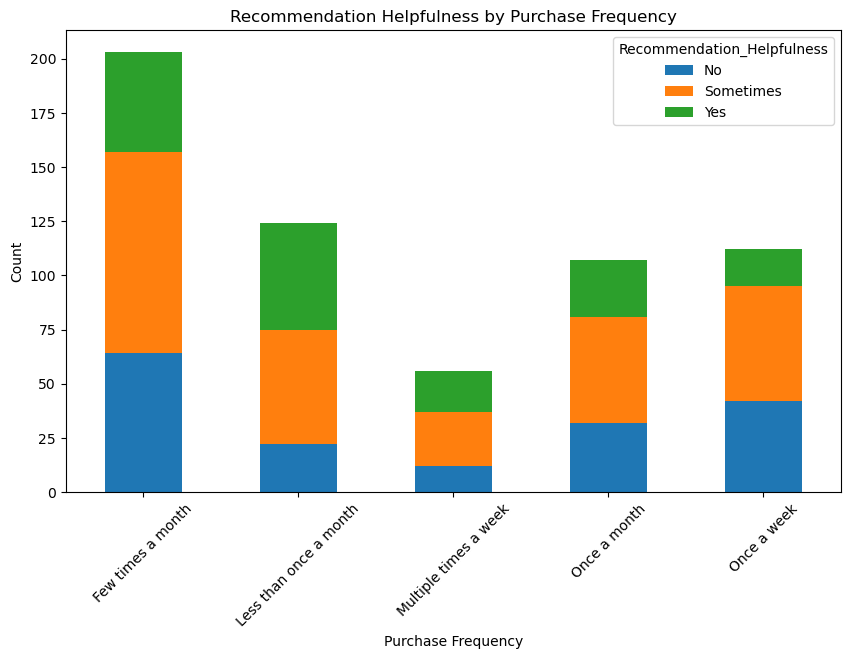

In [42]:
unique_grouped = data_df.groupby(['Purchase_Frequency', 'Recommendation_Helpfulness']).size().unstack()
unique_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Recommendation Helpfulness by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

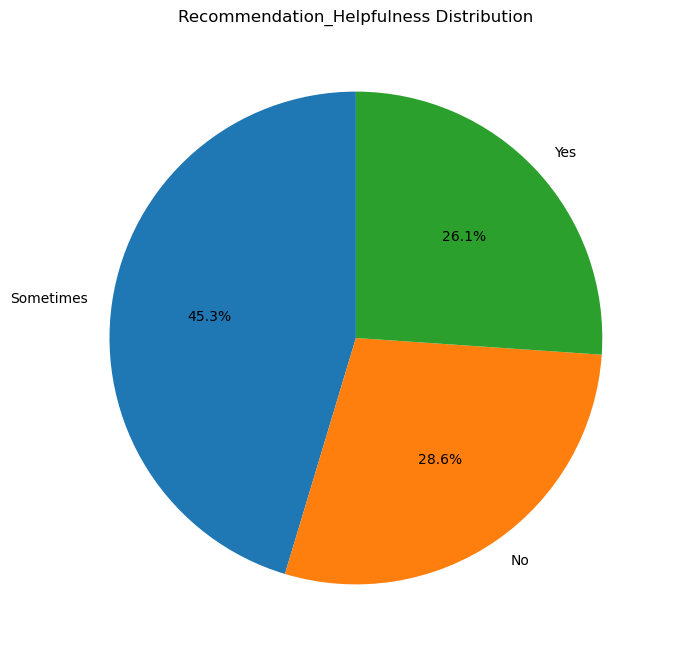

In [46]:
# pie chart
# group data by 'Recommendation_Helpfulness' and calculate counts
recommendation_helpfulness_counts = data_df['Recommendation_Helpfulness'].value_counts()

# create pie chart
plt.figure(figsize=(8,8))
plt.pie(recommendation_helpfulness_counts, labels=recommendation_helpfulness_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Recommendation_Helpfulness Distribution')

plt.show()